# Machine Learning Engineer Nanodegree

## Capstone Project
Mahmoud Helal, May 4th, 2019

## Project: Predict Mobile App Success


## I) Introduction

Most new applications and startups tend to fail; 90% of startups fail and the number one for failure is the lack of market need of their product, so any startup or company intend to develop a new mobile app needs to make certain their App fulfill a market need; A model can predict application success by classifying the estimated number of downloads will occur based on previous similar applications published on the App store with similar features can help most of startups and mobile development companies to take business decisions to proceed or alter their plans from earlier stages, save money and reduce risks and increase customer satisfaction.

## II) Project Design

This project will consist of 8 main stages in order to build our kernel

1. **Datasets and Inputs:** will import our dataset and remove noise (NANs, duplications, ...).
2. **Data Visualization:** will explore and represent our dataset graphically in order to have some insights.
3. **Data Pre-processing:** will Prepare our dataset for classification phase (removing not useful features, make one-hot-encoding,..)
4. **Evaluation Metrics:** will identify our score method that used to evaluate our classifiers.
5. **Benchmark:** will build Linear regression classifier as a benchmark model and get baseline performance values.
6. **Algorithms and Techniques:** will explore more classifiers (Naive Bayes, Decision Trees, SVM, Gradient Boosting) and compare results with base kernel result then choose the best two classifiers to the enhancement stage.
7. **Enhancements:** will try to use PCA for feature reduction to enhance classification results.
8. **Final Kernel:** based on previous results we will choose the final classifier and enhancement tuning to our kernel.

Finally, we will try to test our kernel with some random data and check if our kernel behaves as expected to solve our business problem or not and give suggestions for improvement.

### 1. Datasets and Inputs

The dataset that will used is "[Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)" from [Kaggle](https://www.kaggle.com/), the dataset structured in CSV format in one file named “googleplaystore” with 10.8k rows and 13 columns each row indicates real mobile application in play store and columns represent features as follows : Application name, Category the app belongs to, Overall user rating, Number of user reviews, Size of the app, Number of user downloads/installs, Type (Paid or Free), Price, Rating, Age group the app is targeted at (Children, Mature 21+, Adult), Genres, Last Updated, Current Version, Min required Android version.

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [92]:
## Read file
raw_data = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")
print('Shape of the google playstore data',raw_data.shape)
raw_data.head()

Shape of the google playstore data (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will do some data cleaning, we need to check `NAN`s percentage in our dataset, so the following code calculates NANs percentage in each columns and sort them descendingly

In [93]:
total = raw_data.isnull().sum().sort_values(ascending=False)
percent = 100*(raw_data.isnull().sum()/raw_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (%)'])

print(missing_data)

                Total  Percent (%)
Rating           1474    13.596532
Current Ver         8     0.073794
Android Ver         3     0.027673
Content Rating      1     0.009224
Type                1     0.009224
Last Updated        0     0.000000
Genres              0     0.000000
Price               0     0.000000
Installs            0     0.000000
Size                0     0.000000
Reviews             0     0.000000
Category            0     0.000000
App                 0     0.000000


As shown from table above the most NANs exist in Rating column with 13.6%, sadly we think Rating column is an important feature that affect application success as more rating can leads to more number of installs unlike other columns/features like Current version, Android Version,  Content Rating and Type

In [94]:
raw_data.dropna(inplace=True)
print('Shape of the google playstore data',raw_data.shape)

Shape of the google playstore data (9360, 13)


Also we will check data duplicates (entire row matching), and remove redundand data from dataset before going any further 

In [95]:
duplicate_sum = raw_data.duplicated().sum()
percentage = 100 * (duplicate_sum / len(raw_data.index))

print('The dataset contains {} duplicate row that represent {}% of overall dataset '.format(duplicate_sum, percentage))
raw_data=raw_data.drop_duplicates()
print('Shape of the google playstore data',raw_data.shape)

The dataset contains 474 duplicate row that represent 5.064102564102564% of overall dataset 
Shape of the google playstore data (8886, 13)


### 2. Data Visualization

In this section we explore and visualize dataset, the graphical representation of data will allow us to better understand the dataset, data patterns and outliers can be detected using visual elements like charts and graphs. 

We will first import graph libraries 

In [96]:
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt

%matplotlib inline

We will use `data_visual` for any manipulation needed to visualize data and leave `raw_data` untouched 

In [97]:
data_visual = raw_data.copy()
data_visual.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8886,8886,8886.000000,8886,8886,8886,8886,8886,8886,8886,8886,8886,8886
unique,8190,33,NaN,5990,413,19,2,73,6,115,1299,2638,31
top,ROBLOX,FAMILY,NaN,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1717,NaN,82,1468,1485,8275,8275,7089,732,291,1258,1987
mean,NaN,NaN,4.187959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.522428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The table above gives us some insights about the dataset, for example, there are 8886 apps (after removing duplications and NANs records), there are 33 different categories and the most Apps under `FAMILY` category, rating column ranges from 1 to 5 and most dataset rating values tends to lay around (4.18 +/- 0.5), Apps have two Types Free and Paid.

The following graph will represent the number of applications per category that will indicate the category most applications belongs to in this dataset

Text(0.5, 1.0, 'Total apps of each Category')

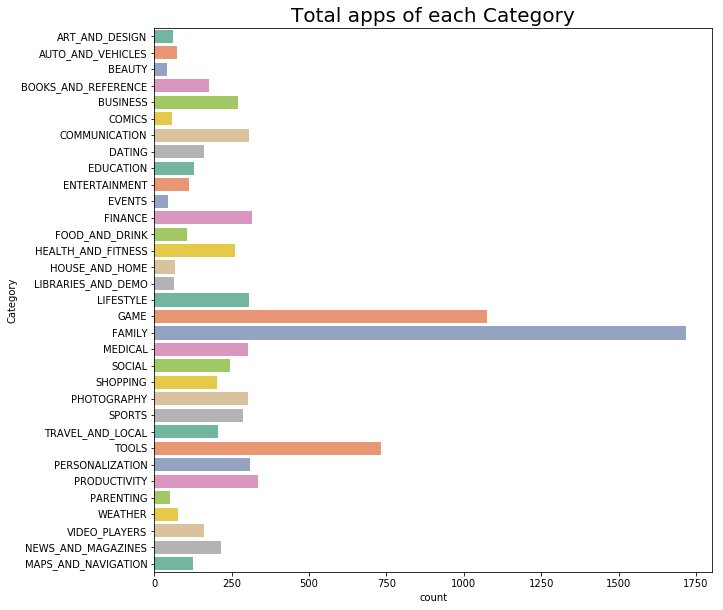

In [98]:
plt.figure(figsize=(10,10))
g = sns.countplot(y="Category",data=data_visual, palette = "Set2")
plt.title('Total apps of each Category',size = 20)

As shown in previous graph the largest number of apps under `FAMILY` category (above 1600 app) as mentioned earlier then `GAMES` (above 1000) and `TOOLS` (above 650), then other apps distributed among other categories.

The following graph will demonstrate the number of installations in each category this will represent the most (successful) category that mobile apps belong to

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Installations in each Category')

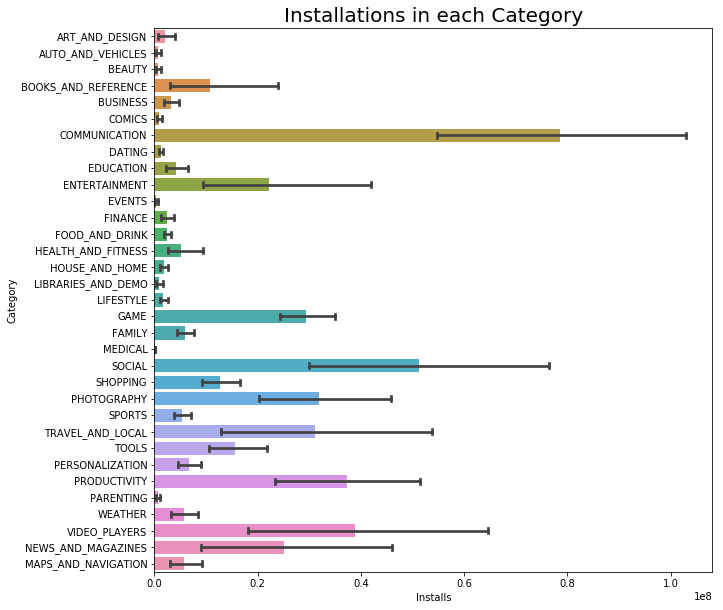

In [99]:
data_visual['Installs'] = data_visual['Installs'].str.replace(r'\D','').astype(int)

plt.figure(figsize=(10,10))
g = sns.barplot(x="Installs", y="Category", data=data_visual, capsize=.3)
plt.title('Installations in each Category',size = 20)

As shown in previous graph the most installed apps under `COMMUNICATION` category even the number of apps wasn't high in this category (see the first graph) then the `SOCIAL` applications lets have a look into some applications that reached 1000M downloads

In [100]:
data_visual[data_visual.Installs == 1000000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


Most of the applications are very known applications (Google Play Books, WhatsApp, Chrome, Gmail) and they are under the communication category (except Google Play Books)

### 3.	Data Pre-processing
In this section should demonstrate preprocessing data by removing noise (duplicates, NANs, outliers,...) however, this part done earlier just after importing dataset, to deal with clean data in data visualization section, however in this part we will prepare data for classification to enhance classifier accuracy and our kernel performance also will work on 'Installs' column as it considered our target labels

In order to facilitate our work we implement 'preprocessor_data' method that takes raw_data and prepare the dataset for classification as follows:

* Will cast features with their datatypes (instead of an object) so columns Reviews will cast to int, Last Updated to date-time, Rating and price to float (and remove $ from Price column).
* Will encode features (Type, Category, Content Rating) by label encoding method as most articles state classifiers do a better job with numeric features.
* One-hot-encoding will be applied to Genres features and handle Apps with multiple Genres. 
* Replace 'Varies with device' values Size column with an estimated average size in the same category, also unified size values by converting Megabytes and Kilobytes into Bytes, then normalizing App size values. 

* Sorting data by 'Last Updated' values that make data sorted from old to new, this step is necessary for the next stage (split train and test sets) to make test set contains newer data which simulate the old data used to train our kernel and the new data is used for prediction
* Remove un-important features that we think it'll affect a lot like (App, Current Ver, Android Ver, Last Updated), as Last Updated used only for sorting and more need as a feature for classifiers

'Installs' columns considered our targets/labels for our classifiers, as we need to detect our App success based on the number of downloads we should categorize our target as follows

* The number of installs below 5K will consider a _**failed application**_ under category (zero).
* The number of installs between 5K and below 1M will consider a _**limited success application**_ under category (one).
* The number of installs above 1M will consider a _**successful application**_ under category (two).

In [101]:
from sklearn import preprocessing

def encode_feature(data_feature):
    le = preprocessing.LabelEncoder()
    new_label = le.fit_transform(data_feature)
    return new_label

In [102]:
def preprocessor_data(data):
    data.drop(labels = ['App', 'Current Ver','Android Ver'], axis = 1, inplace = True)
    
    data['Last Updated']= pd.to_datetime(data['Last Updated'], format='%B %d, %Y')
    data['Installs'] = data['Installs'].str.replace(r'\D','').astype(int)
    data['Price']=data['Price'].str.replace('$','').astype(float)

    data['Reviews']=data['Reviews'].astype(int)
    data['Rating']=data['Rating'].astype(float)

    data['Type'] = encode_feature(data['Type'])
    data['Category'] = encode_feature(data['Category'])
    data['Content Rating'] = encode_feature(data['Content Rating'])
    
    data['Size'].replace('Varies with device', np.nan, inplace = True ) 
    data['Size']= (data['Size'].replace(r'[kM]+$', '', regex=True).astype(float) * \
             data['Size'].str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
    data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)
    data['Size'] =(data['Size']-data['Size'].min())/(data['Size'].max()-data['Size'].min())

    data2 = data['Genres'].str.get_dummies(sep=';').rename(lambda x: 'Genres_' + x, axis='columns')
    data = pd.concat([data,data2],axis=1)
    data.drop(labels = ['Genres'], axis = 1, inplace = True)
    
    data.loc[data['Installs'] < 5000, 'Installs'] = 0 
    data.loc[(data['Installs'] >= 5000) & (data['Installs'] < 1000000), 'Installs'] = 1 
    data.loc[data['Installs'] >= 1000000, 'Installs'] = 2
    
    data = data.sort_values(by=['Last Updated'])
    data.drop(labels = ['Last Updated'], axis = 1, inplace = True)

    return data

In [103]:
#dropping of unrelated and unnecessary items
preprocessed_data = preprocessor_data(raw_data.copy())
print('Shape after preprocessed_data data',preprocessed_data.shape)
preprocessed_data.tail()

Shape after preprocessed_data data (8886, 61)


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres_Action,Genres_Action & Adventure,Genres_Adventure,Genres_Arcade,Genres_Art & Design,Genres_Auto & Vehicles,Genres_Beauty,Genres_Board,Genres_Books & Reference,Genres_Brain Games,Genres_Business,Genres_Card,Genres_Casino,Genres_Casual,Genres_Comics,Genres_Communication,Genres_Creativity,Genres_Dating,Genres_Education,Genres_Educational,Genres_Entertainment,Genres_Events,Genres_Finance,Genres_Food & Drink,Genres_Health & Fitness,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Maps & Navigation,Genres_Medical,Genres_Music,Genres_Music & Audio,Genres_Music & Video,Genres_News & Magazines,Genres_Parenting,Genres_Personalization,Genres_Photography,Genres_Pretend Play,Genres_Productivity,Genres_Puzzle,Genres_Racing,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
10712,26,4.4,61392,0.168956,2,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10408,14,4.3,320334,0.270000,2,0,0.00,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10718,12,3.9,28,0.150000,1,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10209,29,4.3,434,0.036000,1,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10760,15,4.4,35,0.024000,0,1,7.99,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We want to check the number of Apps under every Installs/target category in order to detect if our dataset is balanced or not i.e. Apps are equally distributed under every Installs/target.

In [104]:
preprocessed_data['Installs'].value_counts().sort_index()

0    1336
1    3499
2    4051
Name: Installs, dtype: int64

As appears from results above the dataset are not balanced as 15% in category 0 (failed), 39% in category 1 (limited success), and 46% in category 2 (success).

The last step is to split the dataset into training and testing sets we will use 75% of data as a training set and 25% as testing set taking in consideration the newer data are in prediction as mentioned previously

In [105]:
from sklearn.model_selection import train_test_split 

train_label = preprocessed_data['Installs']
train_data = preprocessed_data.drop('Installs', axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.25, shuffle=False)

print('X_train Shape : {}, y_train Shape : {}'.format(X_train.shape, y_train.shape))
print('X_test  Shape : {}, y_test  Shape : {}'.format(X_test.shape,  y_test.shape ))

X_train Shape : (6664, 60), y_train Shape : (6664,)
X_test  Shape : (2222, 60), y_test  Shape : (2222,)


### 4. Evaluation Metrics

The main evaluation method that will be used to measure kernel performance is f beta score with beta = 1; F1 score is considered a good evaluation metric for unbalanced datasets, the optimal value at 1 for perfect classifier and worst value at 0 for random classifier, we will implement 'performance_metric' method to evaluate classifiers performance.

In [106]:
from sklearn.metrics import f1_score

def performance_metric(y_true, y_predict):
    score = f1_score(y_true, y_predict, average='micro')
    
    return score

We will just make a small test for 'performance_metric' method to make sure it will behave as we expected.

In [107]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 2, 0, 0, 1] # 3 labels out of 6 are correct (0%)
y_pred_bad = [1, 2, 1, 2, 0, 1] # 0 labels out of 6 are correct (50%)

right_score =  performance_metric(y_true, y_true)
score =  performance_metric(y_true, y_pred)
bad_score =  performance_metric(y_true, y_pred_bad)  


print('bad score = ({}), best score = ({}), random score = ({}) '.format(bad_score, right_score, score))

bad score = (0.0), best score = (1.0), random score = (0.5) 


### 5. Benchmark

In this section we will build the basic kernel with simple classifier (Logistic Regression) and the output performance will be used as the datum for further classifiers and enhancements applied to the kernel to compare how far our kernel progress.

We will implement 'evaluate_classifier' method that will be used to evaluate our benchmark model and further implemented models

In [108]:
from time import time

def evaluate_classifier(cls, X_train, X_test, y_train, y_test):
    
    start_train = time() # Get start time
    cls.fit(X_train,y_train)
    end_train = time() # Get end time

    start_test = time() # Get start time
    y_train_pred = cls.predict(X_train)
    y_test_pred = cls.predict(X_test)
    end_test = time() # Get end time

    y_train_score =  performance_metric(y_train, y_train_pred)
    y_test_score =  performance_metric(y_test, y_test_pred)

    train_time = end_train - start_train
    test_time = end_test - start_test
    
    print('- Classifier[{}]\n- Training f1-score = ({:.4f}) in {:.4f}s.\n- Testing f1-score = ({:.4f}) in {:.4f}s.'.format(cls.__class__.__name__,y_train_score, train_time, y_test_score, test_time))

We will evaluate Logistic Regression classifier and analyze output results, Logistic Regression considered very fast algorithm, and easy to implement and can handle the large number of dataset.

In [109]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(multi_class='ovr', solver='liblinear')
evaluate_classifier(clf_lr, X_train, X_test, y_train, y_test)

- Classifier[LogisticRegression]
- Training f1-score = (0.4203) in 0.0602s.
- Testing f1-score = (0.7385) in 0.0050s.


As expected Logistic Regression classifier is very fast classifier and gives acceptable results as prediction score = 0.73 however, we need to improve performance and reach 0.85 ~ 0.9 in order to build a good kernel.

### 6. Algorithms and Techniques
In this section, we will explore four more classifiers (Naive Bayes, decision trees, SVM, Gradient Boosting) and compare results with base kernel result then choose the best two classifiers to the enhancement stage

**First** will test _Naive Bayes_ classifier, NBC is based on Bayes' Theorem which describes the probability of a certain event, based on prior knowledge of conditions that might be related to this event.   

In [110]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()

evaluate_classifier(clf_gnb, X_train, X_test, y_train, y_test)

- Classifier[GaussianNB]
- Training f1-score = (0.7375) in 0.0118s.
- Testing f1-score = (0.8339) in 0.0121s.


**Second** _Decision Tree_ classifier, DTC goal is to create a model that predicts a target based on input features using Tree models, in these model leaves represent class labels and branches represent features conjunctions that lead to those class labels.

In [111]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(random_state=333)

evaluate_classifier(clf_dtc, X_train, X_test, y_train, y_test)

- Classifier[DecisionTreeClassifier]
- Training f1-score = (1.0000) in 0.0718s.
- Testing f1-score = (0.9032) in 0.0064s.


**Third** is _Support Vector Machine_ classifier, SVM is considered a robust classifier that aims to find optimal hyperplane that divides feature space by finding the maximum distance between hyperplane and the closest features for all classes (margin), also SVM can be a non-linear classifier if non-linear kernel function is used, the following implementation will use default SVM values except for gamma and kernel type as it should mention for multiclass data

In [112]:
from sklearn.svm import SVC

clf_svc = SVC(random_state=333, gamma='auto', kernel='rbf')
evaluate_classifier(clf_svc, X_train, X_test, y_train, y_test)

- Classifier[SVC]
- Training f1-score = (0.9359) in 6.4302s.
- Testing f1-score = (0.8969) in 3.9732s.


**Fourth** is _Gradient Boosting_ Ensemble Classifier and it's recommended from the article mentioned in the course "If linear regression was a Toyota Camry, then gradient boosting would be a UH-60 Blackhawk Helicopter" [SOURCE](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/), also author mentioned it used to win many Kaggle competitions.

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(random_state=333)

evaluate_classifier(clf_gbc, X_train, X_test, y_train, y_test)

- Classifier[GradientBoostingClassifier]
- Training f1-score = (0.9253) in 3.3559s.
- Testing f1-score = (0.9383) in 0.0442s.


#### Results and observations

As shown from results above the top classifiers are Gradient Boosting Classifier with score = 0.938 and Decision Tree Classifier with score = 0.90, SVM was very close with score = 0.89 and although NBC is the last score = 0.83, but it considered the fastest training algorithm between the other four algorithms, overall the results reached our expectations as we hope to get results from 0.85~0.9, the graph below shows F1-Score result for each mentioned classifier.

Text(0.5, 1.0, 'F1-Score For Each Classifier')

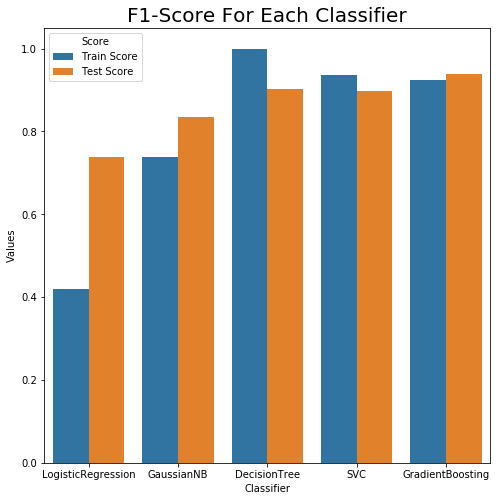

In [114]:
clf_scores_plt = pd.DataFrame({'Classifier':['LogisticRegression', 'GaussianNB', 'DecisionTree', 'SVC', 'GradientBoosting', 'LogisticRegression', 'GaussianNB', 'DecisionTree', 'SVC', 'GradientBoosting'],
'Score':['Train Score' ,'Train Score' ,'Train Score' ,'Train Score' ,'Train Score' ,'Test Score' ,'Test Score' ,'Test Score' ,'Test Score' ,'Test Score'],
'Values':[0.4203, 0.7375, 1.0000, 0.9359, 0.9253, 0.7385, 0.8339, 0.9032, 0.8969, 0.9383]})

plt.figure(figsize=(8,8))
sns.barplot(x="Classifier",y="Values", hue="Score",data=clf_scores_plt)
plt.title('F1-Score For Each Classifier',size = 20)

As mentioned NBC considered fastest algorithm with least (and considered not bad) result, in other hand SVM considered the slowest algorithm in both training and prediction phases the graph below demonstrates Time consumed by each classifier.

Text(0.5, 1.0, 'Train/Test Time For Each Classifier')

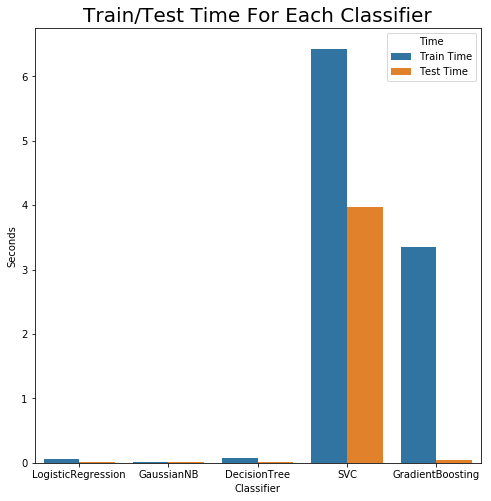

In [129]:
clf_time_plt = pd.DataFrame({'Classifier':['LogisticRegression', 'GaussianNB', 'DecisionTree', 'SVC', 'GradientBoosting', 'LogisticRegression', 'GaussianNB', 'DecisionTree', 'SVC', 'GradientBoosting'],
'Time':['Train Time', 'Train Time', 'Train Time', 'Train Time', 'Train Time', 'Test Time', 'Test Time','Test Time','Test Time','Test Time'],
'Seconds':[0.0602, 0.0118, 0.0718, 6.4302, 3.3559, 0.0050, 0.0121, 0.0064, 3.9732, 0.0442]})

plt.figure(figsize=(8,8))
ax = sns.barplot(x="Classifier",y="Seconds", hue="Time",data=clf_time_plt)
plt.title('Train/Test Time For Each Classifier',size = 20)

#### Kernel Reliability

We will use cross-validation technique to test classifiers reliability, cross-validation divides the training data into k parts (k=10 in our implementation), then using 9 parts as a training dataset and test with the remaining part (validation dataset) then repeat this operation 10-times then the final result is the average score of 10 trails.

In [116]:
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer

def coss_validate_clf(cls, X_train, y_train):
    fone_scorer = make_scorer(f1_score, average='micro')
    scores = cross_validate(cls, X_train, y_train, cv=10,scoring=fone_scorer, return_train_score=True)
    print('--------------Classifier [%s] ----------------'  % (cls.__class__.__name__))
    print("- Train score: %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
    print("- Test score: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

In [117]:
coss_validate_clf(clf_lr, X_train, y_train)

coss_validate_clf(clf_gnb, X_train, y_train)
coss_validate_clf(clf_dtc, X_train, y_train)
coss_validate_clf(clf_svc, X_train, y_train)
coss_validate_clf(clf_gbc, X_train, y_train)

--------------Classifier [LogisticRegression] ----------------
- Train score: 0.55 (+/- 0.33)
- Test score: 0.54 (+/- 0.34)
--------------Classifier [GaussianNB] ----------------
- Train score: 0.74 (+/- 0.01)
- Test score: 0.74 (+/- 0.08)
--------------Classifier [DecisionTreeClassifier] ----------------
- Train score: 1.00 (+/- 0.00)
- Test score: 0.86 (+/- 0.04)
--------------Classifier [SVC] ----------------
- Train score: 0.94 (+/- 0.00)
- Test score: 0.83 (+/- 0.03)
--------------Classifier [GradientBoostingClassifier] ----------------
- Train score: 0.93 (+/- 0.00)
- Test score: 0.90 (+/- 0.02)


Again _Gradient Boosting Classifier_ and  _Decision Tree Classifier_ proves there are most reliable classifiers with mean scores 0.90 and 0.86 respectively, the graph below shows average F1-Score for each classifier in the cross-validation phase.

Text(0.5, 1.0, 'Average F1-Score For Cross-Validation For Each Classifier')

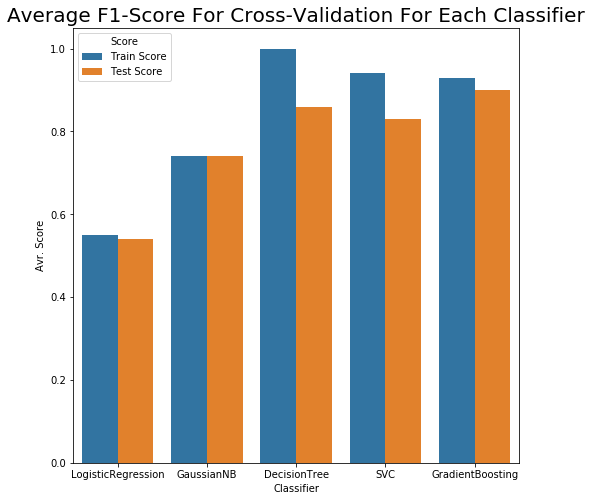

In [118]:
clf_cv_plt = pd.DataFrame({'Classifier': ['LogisticRegression', 'GaussianNB', 'DecisionTree', 'SVC', 'GradientBoosting', 'LogisticRegression', 'GaussianNB', 'DecisionTree', 'SVC', 'GradientBoosting'],
'Score':['Train Score' ,'Train Score' ,'Train Score' ,'Train Score' ,'Train Score' ,'Test Score' ,'Test Score' ,'Test Score' ,'Test Score' ,'Test Score'],
'Avr. Score':[0.55, 0.74, 1.00, 0.94, 0.93, 0.54, 0.74, 0.86, 0.83, 0.90]})

plt.figure(figsize=(8,8))
ax = sns.barplot(x="Classifier",y="Avr. Score", hue="Score",data=clf_cv_plt)
plt.title('Average F1-Score For Cross-Validation For Each Classifier',size = 20)

### 7. Enhancements

In this section we will try to enhance our kernel results, for now, we will try applying PCA before classification stage many articles mentioned it improve classification performance [\[HERE\]](https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32) , PCA is a technique for dimensionality reduction the main goal is to project data on the minimum number of principal components that represent the maximum number of variance of data, we will try a different number of dimensionality reduction components from 25 to 55 and observe output results from two classifiers (Decision Tree and Gradient Boosting) 

In [132]:
from sklearn.decomposition import PCA

def pca_init(pca_comp):
    pca = PCA(n_components=pca_comp)
    # TODO: Apply PCA by fitting the good data with the same number of dimensions as features
    pca.fit(X_train)

    x_train_pca = pca.transform(X_train)
    x_test_pca = pca.transform(X_test)
    print('-----------------[PCA Component=',pca_comp,']-----------------', )
    print('x_train_pca Shape : {}, y_train Shape : {}'.format(x_train_pca.shape, y_train.shape))
    print('x_test_pca  Shape : {}, y_test  Shape : {}'.format(x_test_pca.shape,  y_test.shape ))
    
    return pca,x_train_pca, x_test_pca

In [133]:
pca_componnents = [20,25,30,35,40,45,50,55]

for pca_comp in pca_componnents:
    pca, x_train_pca, x_test_pca = pca_init(pca_comp)
    evaluate_classifier(clf_dtc, x_train_pca, x_test_pca, y_train, y_test)
    evaluate_classifier(clf_gbc, x_train_pca, x_test_pca, y_train, y_test)

-----------------[PCA Component= 20 ]-----------------
x_train_pca Shape : (6664, 20), y_train Shape : (6664,)
x_test_pca  Shape : (2222, 20), y_test  Shape : (2222,)
- Classifier[DecisionTreeClassifier]
- Training f1-score = (1.0000) in 0.2106s.
- Testing f1-score = (0.9118) in 0.0014s.
- Classifier[GradientBoostingClassifier]
- Training f1-score = (0.9293) in 3.6993s.
- Testing f1-score = (0.9383) in 0.0388s.
-----------------[PCA Component= 25 ]-----------------
x_train_pca Shape : (6664, 25), y_train Shape : (6664,)
x_test_pca  Shape : (2222, 25), y_test  Shape : (2222,)
- Classifier[DecisionTreeClassifier]
- Training f1-score = (1.0000) in 0.2605s.
- Testing f1-score = (0.9127) in 0.0015s.
- Classifier[GradientBoostingClassifier]
- Training f1-score = (0.9307) in 4.7756s.
- Testing f1-score = (0.9392) in 0.0360s.
-----------------[PCA Component= 30 ]-----------------
x_train_pca Shape : (6664, 30), y_train Shape : (6664,)
x_test_pca  Shape : (2222, 30), y_test  Shape : (2222,)
- C

Best score for Decision Tree Classifier was 0.9127 when was number of PCA component = 25 and best score for Gradient Boosting Classifier was 0.9392 when was number of PCA component = 25, both results are slightly increased however, we where expected better performance and lower time for training and prediction but we understand it will be very hard to enhance the results that already high (above 0.9), the graph below demonstrate F1-Score for prediction data for our selected classifiers over number of components ranges from 20 to 55

Text(0.5, 1.0, 'Prediction F1-Score For Selected Classifiers Over Number Of Components')

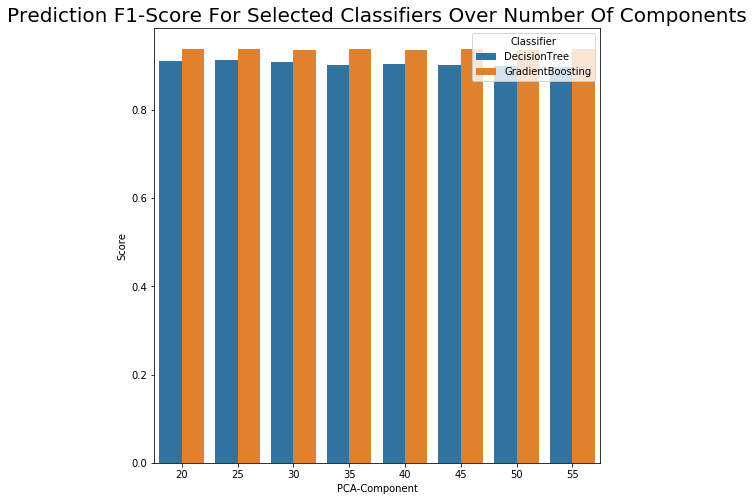

In [135]:
clf_pca_plt = pd.DataFrame({'PCA-Component': [20,20,25,25,30,30,35,35,40,40,45,45,50,50,55,55],
'Classifier':['DecisionTree' ,'GradientBoosting' ,'DecisionTree' ,'GradientBoosting' ,'DecisionTree' ,'GradientBoosting' ,'DecisionTree' ,'GradientBoosting' ,'DecisionTree' ,'GradientBoosting' ,'DecisionTree' ,'GradientBoosting' ,'DecisionTree' ,'GradientBoosting' ,'DecisionTree' ,'GradientBoosting'],
'Score':[0.9118, 0.9383, 0.9127, 0.9392, 0.9100, 0.9370, 0.9032, 0.9383, 0.9050, 0.9370, 0.9014, 0.9379, 0.8992, 0.9370, 0.8983, 0.9374]})

plt.figure(figsize=(8,8))
ax = sns.barplot(x="PCA-Component",y="Score", hue="Classifier",data=clf_pca_plt)
plt.title('Prediction F1-Score For Selected Classifiers Over Number Of Components',size = 20)

### 8. Final Kernel

Our final kernel will use PCA technique with 25 principal components and Gradient Boosting Classifier to detect Mobile App success

In [122]:
best_comp_num = 25
pca,x_train_pca, x_test_pca = pca_init(best_comp_num)
evaluate_classifier(clf_gbc, x_train_pca, x_test_pca, y_train, y_test)

-----------------[PCA Component= 25 ]-----------------
x_train_pca Shape : (6664, 25), y_train Shape : (6664,)
x_test_pca  Shape : (2222, 25), y_test  Shape : (2222,)
- Classifier[GradientBoostingClassifier]
- Training f1-score = (0.9304) in 4.3922s.
- Testing f1-score = (0.9397) in 0.0336s.


## III) Test Kernel

In this section, we will take 8 random Apps and check their number of installs and get their actual successful rate (Fail, limited success, success), then run against our final kernel then compare predicted output with actual one and calculate the score

In [146]:
import random

sample_num = 8
row_index = []
for x in range(sample_num):
  row_index.append(random.randint(1,8887)) 

print(row_index)

[7580, 6908, 5559, 5836, 1802, 5278, 4260, 4879]


In [147]:
sample_data = raw_data.iloc[row_index]
sample_data.head(n=sample_num)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9141,NBA LIVE Mobile Basketball,SPORTS,4.4,1690802,58M,"50,000,000+",Free,0,Everyone,Sports,"May 21, 2018",2.3.1,4.0 and up
8305,"CallApp: Caller ID, Blocker & Phone Call Recorder",COMMUNICATION,4.4,483782,20M,"10,000,000+",Free,0,Everyone,Communication,"July 29, 2018",1.286,4.1 and up
6523,BN Pro Roboto-b Neon HD Text,LIBRARIES_AND_DEMO,4.4,30,721k,"5,000+",Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
6925,BlackCam Pro - B&W Camera,PHOTOGRAPHY,4.5,1376,5.5M,"100,000+",Paid,$1.49,Everyone,Photography,"March 26, 2018",1.51,4.0 and up
2118,Disney Magic Kingdoms: Build Your Own Magical ...,FAMILY,4.3,472584,91M,"10,000,000+",Free,0,Everyone,Simulation;Action & Adventure,"August 2, 2018",3.2.0h,4.0.3 and up
6136,BG BRIDAL GALLERY,LIFESTYLE,4.6,17,19M,"1,000+",Free,0,Everyone,Lifestyle,"June 27, 2018",2.1.1,4.4 and up
4915,"AC Air condition Troubleshoot,Repair,Maintenance",BOOKS_AND_REFERENCE,4.2,27,3.1M,"5,000+",Free,0,Everyone,Books & Reference,"February 7, 2018",1.1,4.0 and up
5655,Au Pair Legend,LIFESTYLE,4.4,28,8.8M,"1,000+",Free,0,Everyone,Lifestyle,"July 19, 2018",3.5,5.0 and up


The data above shows random Apps fall under different installs category:

* 2 failed Apps (1000 install or below): BG BRIDAL GALLERY, Au Pair Legend.
* 3 limited success App (between 1K and 1M): BN Pro Roboto-b Neon HD Text, BlackCam Pro - B&W Camera	, AC Air condition Troubleshoot,Repair,Maintenance.	
* 3 success Apps (1M and more): NBA LIVE Mobile Basketball, CallApp: Caller ID, Blocker & Phone Call Recorder, Disney Magic Kingdoms: Build Your Own Magical ...

The mapped indices in pre-processing data are as shown

In [148]:
row_id = list(sample_data.index) 
print(row_id)
sample_preprocessed = preprocessed_data.loc[row_id]
sample_preprocessed.head(n=sample_num)

[9141, 8305, 6523, 6925, 2118, 6136, 4915, 5655]


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres_Action,Genres_Action & Adventure,Genres_Adventure,Genres_Arcade,Genres_Art & Design,Genres_Auto & Vehicles,Genres_Beauty,Genres_Board,Genres_Books & Reference,Genres_Brain Games,Genres_Business,Genres_Card,Genres_Casino,Genres_Casual,Genres_Comics,Genres_Communication,Genres_Creativity,Genres_Dating,Genres_Education,Genres_Educational,Genres_Entertainment,Genres_Events,Genres_Finance,Genres_Food & Drink,Genres_Health & Fitness,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Maps & Navigation,Genres_Medical,Genres_Music,Genres_Music & Audio,Genres_Music & Video,Genres_News & Magazines,Genres_Parenting,Genres_Personalization,Genres_Photography,Genres_Pretend Play,Genres_Productivity,Genres_Puzzle,Genres_Racing,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
9141,28,4.4,1690802,0.580000,2,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8305,6,4.4,483782,0.200000,2,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6523,17,4.4,30,0.000007,1,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6925,24,4.5,1376,0.055000,1,1,1.49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2118,11,4.3,472584,0.910000,2,0,0.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6136,18,4.6,17,0.190000,0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4915,3,4.2,27,0.031000,1,0,0.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5655,18,4.4,28,0.088000,0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We will test this random data with our chosen kernel and observe the output 

In [149]:
sample_result_actual = sample_preprocessed['Installs']
sample_preprocessed.drop(labels=['Installs'], axis=1, inplace=True)

In [151]:
sample_pca = pca.transform(sample_preprocessed)
sample_result = clf_gbc.predict(sample_pca)
print(sample_result)

[2 2 1 1 2 0 1 0]


We will calculate performance via F1-Score method

In [152]:
performance_metric(sample_result,sample_result_actual)

1.0

Our kernel detect **ALL** eight random Apps successfully.

## IV) Conclusion
We successfully implement a kernel for predicting number of installs range the App can obtain if uploaded to Google store given set of features App category, Genres, expected rating,... which indicate if the App will be successful, limited successful, failed, our kernel accuracy is 0.9415 which is high accuracy then we select 8 random Apps observing their features and run against our model and it predicting them all successfully.

## V) Improvement

To enhance kernel accuracy we can apply the following actions:
* Try to tune classifiers  parameters instead of using default values (Grid Search technique might be using)
* Lower number PCA components intervals to 2 (for example) instead of 5 to try more numbers.
* Try Neural Network for classification.
* Can try increase number of label categories to 4 instead 3 to be (fail, limited success, success, booming)